## Import libraries

In [1]:
import pandas as pd
import seaborn as sns
from pathlib import Path
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline
sns.set()

## Load the data

In [2]:
data_path = Path("../data/")
file_name = "pet_adoption_data.csv"
full_data_path = data_path.joinpath(file_name)

In [3]:
def read_data(file_path: Path) -> pd.DataFrame:
    """
    Read the .csv data from the file path.

    :param file_path: the full path of the csv file
    :return: a Pandas dataframe
    """
    df = pd.read_csv(file_path)
    return df

In [4]:
data = read_data(file_path=full_data_path)
print(data.shape)

(2007, 13)


In [5]:
data.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [36]:
data.describe()

,PetID,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
count,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000
mean,1503.000000,92.279522,15.705776,0.701046,0.196313,43.974091,249.142003,0.301943,0.328351
std,579.515315,52.148363,8.327749,0.457914,0.397307,25.740253,142.887040,0.459215,0.469730
min,500.000000,1.000000,1.018198,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1001.500000,48.000000,8.730396,0.000000,0.000000,21.000000,127.000000,0.000000,0.000000
50%,1503.000000,94.000000,15.925416,1.000000,0.000000,45.000000,242.000000,0.000000,0.000000
75%,2004.500000,138.000000,22.737180,1.000000,0.000000,66.000000,375.000000,1.000000,1.000000
max,2506.000000,179.000000,29.995628,1.000000,1.000000,89.000000,499.000000,1.000000,1.000000


## Generate ydata-profiling report

#### Display the profiling report in the Jupyter notebook

In [ ]:
profile = ProfileReport(data, title="Pet Adoption Data Profiling Report")
profile.to_notebook_iframe()

#### Export the profiling report as HTML file to the `reports` folder

In [ ]:
# import os

# reports_dir = Path("../reports/")
# report_file_name = "profiling_report.html"
# full_report_path = reports_dir.joinpath(report_file_name)

# os.makedirs(reports_dir, exist_ok=True)
# profile.to_file(output_file=full_report_path)

Profiling report insights:

- There are 2007 records.
- There are no missing values in any of the columns.
- There are no duplicate records.
- The `Breed` and `PetType` columns are highly correlated.

## Plots

Lets produce some plots to visualize the data.

#### Pet type

Text(0, 0.5, 'Count')

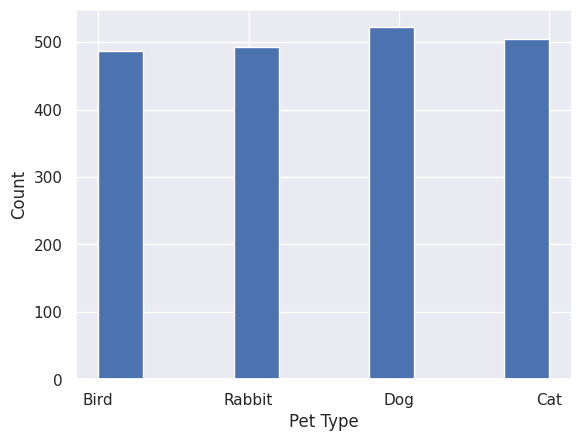

In [6]:
data["PetType"].hist()
plt.xlabel("Pet Type")
plt.ylabel("Count")

#### Breed

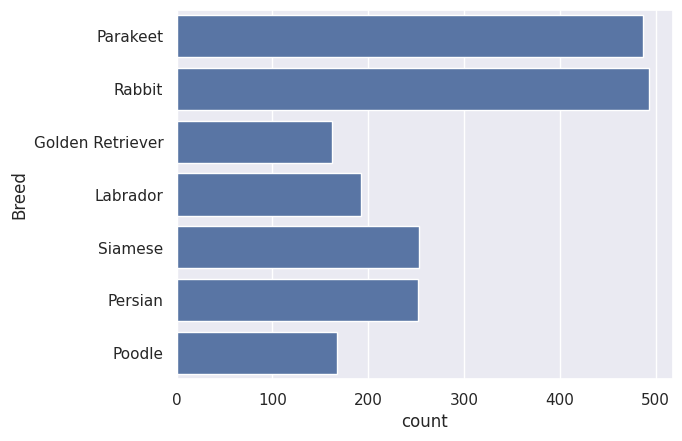

In [7]:
sns.countplot(data["Breed"])
plt.show()

In [47]:
breed_type = data.groupby(["Breed"]).size().reset_index(name="counts")

fig = px.pie(
    breed_type,
    names="Breed",
    values="counts",
    color_discrete_sequence=px.colors.cyclical.Twilight,
    title="Distribution of Breed",
    height=500,
    width=700,
)
fig.show()

#### Pet type and adoption

In [43]:
px.histogram(data, x="PetType", color="AdoptionLikelihood", title="Distribution of Breed")

From the plota above, we see that dogs are slightly more likely to get adopted.